# Bengisu Çetin 20069601

# Ata Berk Çinetçi 19069501

# Emre Erdoğan 19069044

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import openpyxl
from openpyxl import Workbook,load_workbook
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

# Importing whole data set

In [3]:
full_data = pd.read_excel("/Users/ataberkcinetci/Desktop/19069501_19069044_20069601/DataSet _For Assignment.xlsx",index_col=0,header=0,names = ["X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","Y"])

In [4]:
pd.options.display.max_rows = None

In [5]:
full_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
1,-1.304479,0.893299,0.004174,0.838228,2.275087,1.051389,-1.445271,-1.204672,1.060063,-2.078716,0.0
2,0.192248,-1.375891,-1.950357,0.515301,2.304900,-1.555468,1.182440,0.293515,0.325293,1.194239,0.0
3,0.914410,-0.773929,-2.360937,-0.535586,-2.729650,2.125314,2.656328,0.613083,-1.324821,0.606743,1.0
4,-0.083261,-0.939008,0.501041,2.079054,-0.652789,0.854744,-0.236657,-0.730844,-1.213176,0.311913,1.0
5,1.444027,1.102958,1.478792,-0.394127,-1.538776,3.553901,-1.190602,0.699575,1.069579,1.486135,1.0
6,-1.045488,0.592942,0.172535,-2.539717,2.368731,0.536449,-0.782796,-0.412806,1.438591,-1.997295,0.0
7,-1.996042,1.789919,-0.508315,1.147679,-2.229013,0.690258,-0.446545,-1.360971,0.405723,1.484390,1.0
8,-0.336534,-0.634796,2.965292,-0.979691,0.746083,-0.086533,0.328554,-1.660804,0.497074,0.297407,1.0
9,0.664656,0.376811,-3.625430,-0.761375,-0.284231,-0.491864,-2.696847,-1.444886,0.539655,1.460743,1.0
10,-0.365142,-0.875164,-1.135411,-1.072441,0.638210,0.793074,2.023317,-2.596891,0.225244,0.597137,1.0


In [6]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 1 to 1100
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1100 non-null   float64
 1   X2      1100 non-null   float64
 2   X3      1100 non-null   float64
 3   X4      1100 non-null   float64
 4   X5      1100 non-null   float64
 5   X6      1100 non-null   float64
 6   X7      1100 non-null   float64
 7   X8      1100 non-null   float64
 8   X9      1100 non-null   float64
 9   X10     1100 non-null   float64
 10  Y       1000 non-null   float64
dtypes: float64(11)
memory usage: 103.1 KB


In [7]:
full_data.shape

(1100, 11)

In [8]:
full_data.describe() #statistical measures of the data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1000.000000
mean,-0.015730,-0.011290,0.021819,0.004238,-0.042698,0.566252,-0.452327,-0.026092,0.022055,0.050639,0.515000
std,0.994679,1.264838,1.798828,1.003014,1.523270,1.505788,1.425252,0.992950,1.012065,1.429326,0.500025
min,-3.084614,-4.236432,-6.187751,-3.588936,-4.255988,-4.477953,-5.495093,-2.988719,-3.202048,-5.062288,0.000000
25%,-0.697816,-0.864165,-1.058938,-0.670987,-1.065629,-0.414204,-1.269689,-0.723914,-0.641323,-0.913395,0.000000
50%,0.001566,-0.101365,0.071928,0.047440,-0.170378,0.585548,-0.504437,-0.036529,0.019325,0.029364,1.000000
75%,0.645769,0.744822,1.213088,0.643423,0.839845,1.595624,0.344636,0.655298,0.757898,1.000001,1.000000
max,3.206220,4.830565,5.921051,3.612080,5.519611,7.236477,6.242515,3.501391,3.665783,4.771298,1.000000


In [9]:
display(full_data)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
1,-1.304479,0.893299,0.004174,0.838228,2.275087,1.051389,-1.445271,-1.204672,1.060063,-2.078716,0.0
2,0.192248,-1.375891,-1.950357,0.515301,2.304900,-1.555468,1.182440,0.293515,0.325293,1.194239,0.0
3,0.914410,-0.773929,-2.360937,-0.535586,-2.729650,2.125314,2.656328,0.613083,-1.324821,0.606743,1.0
4,-0.083261,-0.939008,0.501041,2.079054,-0.652789,0.854744,-0.236657,-0.730844,-1.213176,0.311913,1.0
5,1.444027,1.102958,1.478792,-0.394127,-1.538776,3.553901,-1.190602,0.699575,1.069579,1.486135,1.0
6,-1.045488,0.592942,0.172535,-2.539717,2.368731,0.536449,-0.782796,-0.412806,1.438591,-1.997295,0.0
7,-1.996042,1.789919,-0.508315,1.147679,-2.229013,0.690258,-0.446545,-1.360971,0.405723,1.484390,1.0
8,-0.336534,-0.634796,2.965292,-0.979691,0.746083,-0.086533,0.328554,-1.660804,0.497074,0.297407,1.0
9,0.664656,0.376811,-3.625430,-0.761375,-0.284231,-0.491864,-2.696847,-1.444886,0.539655,1.460743,1.0
10,-0.365142,-0.875164,-1.135411,-1.072441,0.638210,0.793074,2.023317,-2.596891,0.225244,0.597137,1.0


# Splitting the values which has Y values and has not Y values in full data set


In [10]:
def create_workbook(path):
    workbook = Workbook()
    workbook.save(path)
if __name__ == "__main__":
    create_workbook("/Users/ataberkcinetci/Desktop/19069501_19069044_20069601/data_set_without_Y_values.xlsx")

In [11]:
# Selecting the datas that their Y values are not given
except_Y_values = full_data.iloc[1000:,]

In [12]:
# Writing missing Y valued datas into another excel file 
data_without_Y_values  = pd.read_excel("/Users/ataberkcinetci/Desktop/19069501_19069044_20069601/data_set_without_Y_values.xlsx")


In [13]:
data_without_Y_values  = pd.DataFrame(except_Y_values)
data_without_Y_values.to_excel("/Users/ataberkcinetci/Desktop/19069501_19069044_20069601/data_set_without_Y_values.xlsx")

In [14]:
# Clearing the ungiven Y valued datas in "full data set" 

In [15]:
full_data_set = "/Users/ataberkcinetci/Desktop/19069501_19069044_20069601/DataSet _For Assignment.xlsx"

In [16]:
wb = openpyxl.load_workbook(full_data_set)

In [17]:
sheet = wb['X']

In [18]:
sheet.delete_rows(1002,1100)

In [19]:
sheet.delete_cols(1,1)

In [20]:
wb.save("/Users/ataberkcinetci/Desktop/19069501_19069044_20069601/data_set_with_Y_values.xlsx")

In [21]:
wb.close()

In [22]:
wb2 = openpyxl.load_workbook("/Users/ataberkcinetci/Desktop/19069501_19069044_20069601/data_set_without_Y_values.xlsx")

In [23]:
sheet2 = wb2["Sheet1"]

In [24]:
sheet2.delete_cols(1,1)

In [25]:
sheet2.delete_cols(11,11)

In [26]:
wb2.save("/Users/ataberkcinetci/Desktop/19069501_19069044_20069601/data_set_without_Y_values.xlsx")

In [27]:
wb2.close()

In [28]:
data_set_without_Y_values = pd.read_excel("/Users/ataberkcinetci/Desktop/19069501_19069044_20069601/data_set_without_Y_values.xlsx")

In [29]:
data_set_without_Y_values

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1.854243,-0.078425,-2.090437,2.184340,0.088056,-1.093213,-0.563775,-1.065315,-0.890131,0.178358
1,0.207726,-0.518698,-2.986479,0.136216,-1.650902,2.028340,-0.283361,-1.535706,0.308848,-0.498566
2,-1.345787,-0.020362,0.532323,0.933127,-2.312780,3.309761,-1.418036,0.326152,-1.444867,1.624674
3,0.419527,-1.469835,0.611746,1.312737,-1.931846,-0.814779,0.243534,1.088939,0.018016,-0.352842
4,1.132712,-1.270035,2.537856,-1.531807,1.352672,1.757937,-0.148902,0.627829,1.301874,-0.365061
5,0.890747,0.211917,-2.418891,1.194446,-0.986607,1.856800,2.882103,-1.170351,0.705206,-1.468166
6,-0.420706,0.646599,0.788516,0.819720,2.746644,1.118066,-2.523615,-1.374028,0.257136,-1.439604
7,0.429061,-0.599898,0.546753,1.218752,0.128460,0.334161,-1.031239,0.313764,0.822866,-0.344182
8,-0.386294,-1.433135,0.098585,0.266566,0.217411,1.812322,0.951918,-1.101747,-0.127370,2.361170
9,0.819578,0.911915,-0.015814,1.016832,-0.945169,0.436100,-0.804784,0.067879,1.170458,1.273675


In [30]:
data_with_Y_values = pd.read_excel("/Users/ataberkcinetci/Desktop/19069501_19069044_20069601/data_set_with_Y_values.xlsx")

In [31]:
data_with_Y_values["Y"].value_counts()

1    515
0    485
Name: Y, dtype: int64

In [32]:
data_with_Y_values.groupby("Y").mean()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
Y,,,,,,,,,,
0,-0.018740,-0.293459,0.177256,-0.011985,0.255036,0.529660,-0.387446,0.014344,-0.003281,-0.292849
1,-0.026239,0.274642,-0.086831,0.019542,-0.326533,0.595228,-0.498217,-0.070217,0.035205,0.391855


# Feature Selection

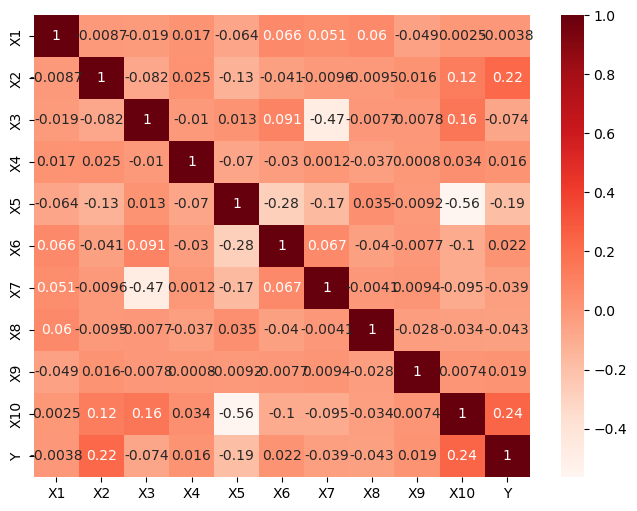

In [33]:
#Using Pearson Correlation
plt.figure(figsize=(8,6))
cor = data_with_Y_values.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

The correlation coefficient has values between -1 to 1 — A value closer to 0 implies weaker correlation (exact 0 implying no correlation) — A value closer to 1 implies stronger positive correlation — A value closer to -1 implies stronger negative correlation

# Normalization

In [67]:
from sklearn import preprocessing
x = data_set_without_Y_values.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
norm_df = pd.DataFrame(x_scaled)
norm_df

,0,1,2,3,4,5,6,7,8,9
0,0.826301,0.426065,0.353870,0.996604,0.418476,0.231885,0.424417,0.303817,0.324338,0.498195
1,0.479616,0.342258,0.276482,0.563972,0.200008,0.698240,0.460433,0.212689,0.590595,0.405427
2,0.152515,0.437118,0.580389,0.732306,0.116855,0.889682,0.314695,0.573386,0.201148,0.696402
3,0.524213,0.161208,0.587248,0.812493,0.164712,0.273482,0.528108,0.721161,0.526010,0.425398
4,0.674378,0.199240,0.753599,0.211630,0.577352,0.657842,0.477703,0.631830,0.811115,0.423723
5,0.623431,0.481332,0.325503,0.787506,0.283464,0.672612,0.867008,0.283469,0.678613,0.272551
6,0.347296,0.564075,0.602515,0.708351,0.752479,0.562246,0.172693,0.244010,0.579111,0.276465
7,0.526220,0.326802,0.581635,0.792640,0.423552,0.445132,0.364375,0.570986,0.704742,0.426585
8,0.354542,0.168194,0.542928,0.591506,0.434727,0.665967,0.619093,0.296760,0.493724,0.797333
9,0.608446,0.614578,0.533048,0.749988,0.288670,0.460362,0.393461,0.523351,0.781932,0.648300


# Seperating data and labels

In [34]:
X = data_with_Y_values.drop(columns="Y",axis=1)
Y = data_with_Y_values["Y"]

# Training and Test data

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(1000, 10) (900, 10) (100, 10)


# Model Training --> Logistic Regression 

In [37]:
model = LogisticRegression()

In [38]:
#training the LR model with training data

In [39]:
model.fit(X_train,Y_train )

LogisticRegression()

In [40]:
#Training and test data
X_train_prediction = model.predict(X_train)
X_test_prediction = model.predict(X_test)

In [41]:
#Train data evaluation
print('Accuracy of train data: {:.2f}'.format(accuracy_score(Y_train, X_train_prediction)))
print('Precision of train data: {:.2f}'.format(precision_score(Y_train, X_train_prediction)))
print('Recall of train data: {:.2f}'.format(recall_score(Y_train, X_train_prediction)))
print('F1 of train data: {:.2f}'.format(f1_score(Y_train, X_train_prediction)))


Accuracy of train data: 0.66
Precision of train data: 0.68
Recall of train data: 0.63
F1 of train data: 0.66


In [42]:
#Test data evaluation
print('Accuracy of test data: {:.2f}'.format(accuracy_score(Y_test, X_test_prediction)))
print('Precision of test data: {:.2f}'.format(precision_score(Y_test, X_test_prediction)))
print('Recall of test data: {:.2f}'.format(recall_score(Y_test, X_test_prediction)))
print('F1 of test data: {:.2f}'.format(f1_score(Y_test, X_test_prediction)))

Accuracy of test data: 0.66
Precision of test data: 0.67
Recall of test data: 0.59
F1 of test data: 0.63


In [43]:
Y_pred = model.predict(X_test)
print(Y_pred)
print(Y_test)

[0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0]
507    1
818    1
452    0
368    0
242    1
929    1
262    1
810    0
318    0
49     1
446    1
142    0
968    1
345    0
971    1
133    1
104    0
6      1
600    1
496    1
702    1
472    1
598    0
502    0
433    1
119    1
108    1
647    0
589    0
374    1
910    1
718    0
744    1
494    0
404    1
274    1
78     0
721    1
644    0
614    0
872    0
691    0
90     0
101    1
94     0
577    1
537    0
41     0
453    0
995    0
713    1
34     0
639    1
35     1
148    1
455    0
885    0
677    0
486    1
685    0
307    1
238    1
395    1
734    1
822    0
812    1
464    1
816    0
528    1
17     1
709    0
370    1
241    0
964    1
457    0
65     1
191    1
838    1
331    0
638    1
255    1
742    0
756    0
757    0
951    0
992    0
463    0
843    0
573 

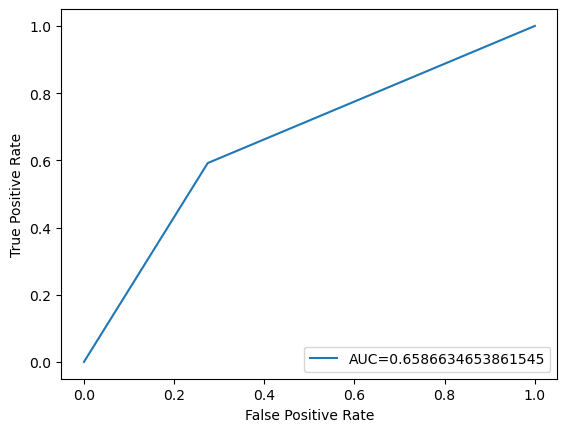

In [44]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred)
auc = metrics.roc_auc_score(Y_test, Y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show(block=True)

In [45]:
#ROC Curves, AUC (Area Under Curve)
Y_score_model = model.fit(X_train, Y_train).decision_function(X_test)
fpr_model, tpr_model, _ = roc_curve(Y_test, Y_score_model)
auc

0.6586634653861545

In [46]:

precision, recall, thresholds = precision_recall_curve(Y_test, Y_score_model)

closest_zero = np.argmin(np.abs(thresholds)) # 


closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

thresholds


array([-1.26056642, -1.07501848, -0.88161264, -0.88035379, -0.87651063,
       -0.83835536, -0.82655081, -0.81948539, -0.77309268, -0.7642928 ,
       -0.73706091, -0.72554972, -0.6919004 , -0.68944776, -0.67300049,
       -0.63771377, -0.59549765, -0.58905571, -0.57488603, -0.56095552,
       -0.54323626, -0.51686582, -0.50746621, -0.50076675, -0.49960352,
       -0.49164123, -0.48430875, -0.43283446, -0.42690408, -0.41774261,
       -0.41613604, -0.40905608, -0.40699348, -0.40095891, -0.39074342,
       -0.38653295, -0.38115382, -0.37600672, -0.36310544, -0.35741745,
       -0.32315231, -0.30592455, -0.28471084, -0.26425429, -0.22987056,
       -0.20081969, -0.19177302, -0.16000925, -0.1441149 , -0.14309437,
       -0.1334663 , -0.11251593, -0.06729013, -0.06636378, -0.04304696,
       -0.00189463,  0.0283774 ,  0.04550205,  0.04725659,  0.0652905 ,
        0.08609497,  0.09615068,  0.10568428,  0.15860434,  0.21753543,
        0.23670549,  0.27104458,  0.36682656,  0.37181159,  0.48

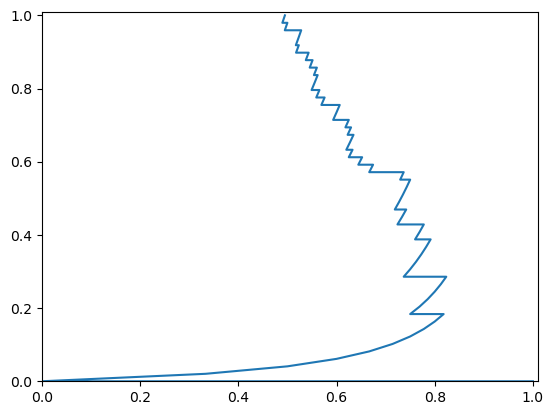

In [47]:
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')

In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)

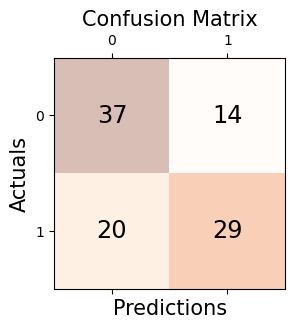

In [49]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix', fontsize=15)

plt.show(block=True)

# Model Training --> KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5,metric='minkowski')
model2.fit(X_train, Y_train)

KNeighborsClassifier()

In [51]:
#Training and test data
X_train_prediction2 = model2.predict(X_train)
X_test_prediction2 = model2.predict(X_test)

/Users/ataberkcinetci/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ataberkcinetci/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

In [52]:
#Train data evaluation
print('Accuracy of train data: {:.2f}'.format(accuracy_score(Y_train, X_train_prediction2)))
print('Precision of train data: {:.2f}'.format(precision_score(Y_train, X_train_prediction2)))
print('Recall of train data: {:.2f}'.format(recall_score(Y_train, X_train_prediction2)))
print('F1 of train data: {:.2f}'.format(f1_score(Y_train, X_train_prediction2)))


Accuracy of train data: 0.77
Precision of train data: 0.77
Recall of train data: 0.81
F1 of train data: 0.79


In [53]:
#Test data evaluation
print('Accuracy of test data: {:.2f}'.format(accuracy_score(Y_test, X_test_prediction2)))
print('Precision of test data: {:.2f}'.format(precision_score(Y_test, X_test_prediction2)))
print('Recall of test data: {:.2f}'.format(recall_score(Y_test, X_test_prediction2)))
print('F1 of test data: {:.2f}'.format(f1_score(Y_test, X_test_prediction2)))

Accuracy of test data: 0.68
Precision of test data: 0.70
Recall of test data: 0.61
F1 of test data: 0.65


In [54]:
Y_pred2 = model2.predict(X_test)
print(Y_pred2)
print(Y_test)

[1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0
 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0]
507    1
818    1
452    0
368    0
242    1
929    1
262    1
810    0
318    0
49     1
446    1
142    0
968    1
345    0
971    1
133    1
104    0
6      1
600    1
496    1
702    1
472    1
598    0
502    0
433    1
119    1
108    1
647    0
589    0
374    1
910    1
718    0
744    1
494    0
404    1
274    1
78     0
721    1
644    0
614    0
872    0
691    0
90     0
101    1
94     0
577    1
537    0
41     0
453    0
995    0
713    1
34     0
639    1
35     1
148    1
455    0
885    0
677    0
486    1
685    0
307    1
238    1
395    1
734    1
822    0
812    1
464    1
816    0
528    1
17     1
709    0
370    1
241    0
964    1
457    0
65     1
191    1
838    1
331    0
638    1
255    1
742    0
756    0
757    0
951    0
992    0
463    0
843    0
573 

/Users/ataberkcinetci/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


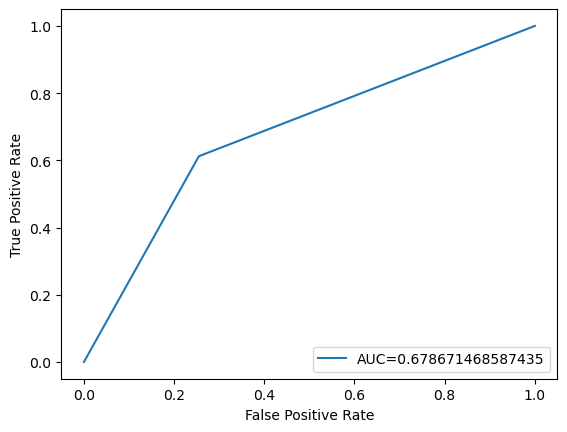

In [55]:
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred2)
auc = metrics.roc_auc_score(Y_test, Y_pred2)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show(block=True)

In [56]:
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(Y_test, Y_pred2)

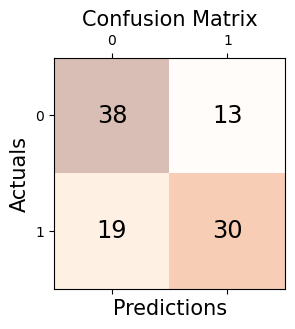

In [57]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm2, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm2.shape[0]):
    for j in range(cm2.shape[1]):
        ax.text(x=j, y=i, s=cm2[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix', fontsize=15)

plt.show(block=True)

### When we examined the model results of Logistics and KNN in the Test Data Set, we saw that KNN gave better results in all performance metrics. Therefore, for this dataset, we chose KNN as the Model because KNN predicts more accurately.

### Because it delivers very precise predictions, the KNN algorithm can compete with the most accurate models. As a result, the KNN method may be used for applications that need high accuracy but do not require a human-readable model.The accuracy of the predictions is determined by the distance measure. As a result, the KNN technique is appropriate for this dataset since adequate domain knowledge is provided.

# Making a Predictive System

In [58]:
input_data = (-1.304479161,0.893298867,0.004173817,0.838227895,2.275086566,1.051389466,-1.445270914,-1.204672204,1.060062935,-2.078716173)
#Changing the input data to a numpy array 
input_data_as_numpy_array = np.asarray(input_data)
#reshape the numpy array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

[0]


/Users/ataberkcinetci/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [59]:
if prediction == [0]:
    print("The object is: 0")
else:
    print("The object is: 1")

The object is: 0


# Last 100 data prediction

In [60]:
data_set_without_Y_values = pd.read_excel("/Users/ataberkcinetci/Desktop/19069501_19069044_20069601/data_set_without_Y_values.xlsx")

In [61]:
values_of_Y = model2.predict(data_set_without_Y_values)

/Users/ataberkcinetci/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [62]:
values_of_Y

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1])

# Changing array to txt file

In [63]:
file = open("/Users/ataberkcinetci/Desktop/19069501_19069044_20069601/Y_values.txt", "w+")

In [64]:
content = str(values_of_Y)

for i in content:
    file.write(i)
    file.write("\n")
    
file.close()